In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
## import libraries

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

## Evaluation
from sklearn.metrics import accuracy_score

## Interface: https://blog.konghy.cn/2017/12/16/python-warnings/
import warnings
warnings.filterwarnings('ignore')

In [9]:
## import datasets
train = pd.read_csv('../input/data-science-london-scikit-learn/train.csv')
test = pd.read_csv('../input/data-science-london-scikit-learn/test.csv')
train_label = pd.read_csv('../input/data-science-london-scikit-learn/trainLabels.csv')

In [10]:
print(train.shape)
print(test.shape)
print(train_label.shape)
train.head()

(999, 40)
(8999, 40)
(999, 1)


,0.29940251144353242,-1.2266241875260637,1.4984250500215328,-1.1761503610375272,5.2898525545597037,0.20829711393323402,2.4044983672405826,1.5945062220589785,-0.051608163273514231,0.66323431039687908,...,-0.85046544625016463,-0.62298999638261954,-1.8330573433160038,0.29302438506869571,3.5526813410266507,0.71761099417552265,3.3059719748508889,-2.7155588147154619,-2.6824085866346223,0.10105047232890663
0,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
1,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
2,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
3,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332
4,-0.773247,-0.123227,0.047423,-0.210266,10.377793,0.526604,-2.751616,0.315541,0.608603,-0.043421,...,-1.487714,0.792790,-0.540711,0.114115,-0.277477,-0.896411,-2.805207,0.469162,3.614157,0.081689


In [12]:
## np.ravel: https://blog.csdn.net/tymatlab/article/details/79009618
X, y = train, np.ravel(train_label)


In [13]:
## 拆成訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## GradientBoostingClassifier

In [15]:
# 建立模型
gbcl = GradientBoostingClassifier()

gbcl.fit(X_train, y_train)
pred_test_y = gbcl.predict(X_test)
acc = accuracy_score(y_test, pred_test_y)
print("Acuuracy: ", acc)

Acuuracy:  0.86


In [21]:
n_estimators = [200, 225, 250, 275, 300]
max_depth = [2, 4, 6, 8, 10]
grid_param = dict(n_estimators=n_estimators, max_depth=max_depth)
grid_param

{'n_estimators': [200, 225, 250, 275, 300], 'max_depth': [2, 4, 6, 8, 10]}

In [22]:
## 建立搜尋物件，放入模型及參數組合字典 (n_jobs=-1 會使用全部 cpu 平行運算)
## GridSearchCV:https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
## scoring選擇 https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
grid_search = GridSearchCV(gbcl, grid_param, scoring="accuracy", n_jobs=-1, verbose=1)
grid_result = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [23]:
# 印出最佳結果與最佳參數
print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best Accuracy: 0.882335 using {'max_depth': 4, 'n_estimators': 250}


In [24]:
# 建立模型
gbcl_bestparam = GradientBoostingClassifier(max_depth=grid_result.best_params_['max_depth'], \
                                  n_estimators=grid_result.best_params_['n_estimators'])

gbcl_bestparam.fit(X_train, y_train)
pred_bestparam_test_y = gbcl_bestparam.predict(X_test)
acc = accuracy_score(y_test, pred_bestparam_test_y)
print("Acuuracy: ", acc)

Acuuracy:  0.885


In [26]:
pred_bestparam_test_y = gbcl_bestparam.predict(test)

submission = {'Id': np.arange(1, pred_bestparam_test_y.shape[0]+1),
             'Solution': pred_bestparam_test_y}
submission = pd.DataFrame(submission)
submission.to_csv('../output/GradientBoostingClassifier_submission.csv', index=False)

In [28]:
# USING THE GAUSSIAN MIXTURE MODEL 
from sklearn.mixture import GaussianMixture
x_all = np.r_[train,test]
print('x_all shape :',x_all.shape)
lowest_bic = np.infty

bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components,covariance_type=cv_type)
        gmm.fit(x_all)
        bic.append(gmm.aic(x_all))
        
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
            
            
best_gmm.fit(x_all)
gmm_train = best_gmm.predict_proba(train)
gmm_test = best_gmm.predict_proba(test)

x_all shape : (9998, 40)


In [29]:
n_estimators = [200, 225, 250, 275, 300]
max_depth = [2, 4, 6, 8, 10]
grid_param = dict(n_estimators=n_estimators, max_depth=max_depth)
grid_param

{'n_estimators': [200, 225, 250, 275, 300], 'max_depth': [2, 4, 6, 8, 10]}

In [33]:
# 建立模型
from sklearn.model_selection import cross_val_score
gbcl = GradientBoostingClassifier(random_state=99)
grid_search_gbcl = GridSearchCV(estimator=gbcl, param_grid=grid_param, cv = 10,scoring='accuracy',n_jobs=-1).fit(gmm_train, train_label.values.ravel())
gbcl_best = grid_search_gbcl.best_estimator_
print('Random Forest Best Score',grid_search_gbcl.best_score_)
print('Random Forest Best Parmas',grid_search_gbcl.best_params_)
print('Random Forest Accuracy',cross_val_score(gbcl_best,gmm_train, train_label.values.ravel(), cv=10).mean())


Random Forest Best Score 0.9950000000000001
Random Forest Best Parmas {'max_depth': 2, 'n_estimators': 200}
Random Forest Accuracy 0.9950000000000001


In [34]:
pred  = gbcl_best.predict(gmm_test)
submission = {'Id': np.arange(1, pred_bestparam_test_y.shape[0]+1),
             'Solution': pred}
submission = pd.DataFrame(submission)
submission.to_csv('../output/GradientBoostingClassifier_submission.csv', index=False)

## KNN

In [12]:
algorithm = ['auto', 'ball_tree', 'brute']
weights = ['uniform', 'distance']
neig = range(1, 40)
train_accuracy = []
test_accuracy = []
best_score = 0.0
best_knn = None

Train Score:  0.9536921151439299
Test Score:  0.915
KNeighborsClassifier(n_neighbors=2)


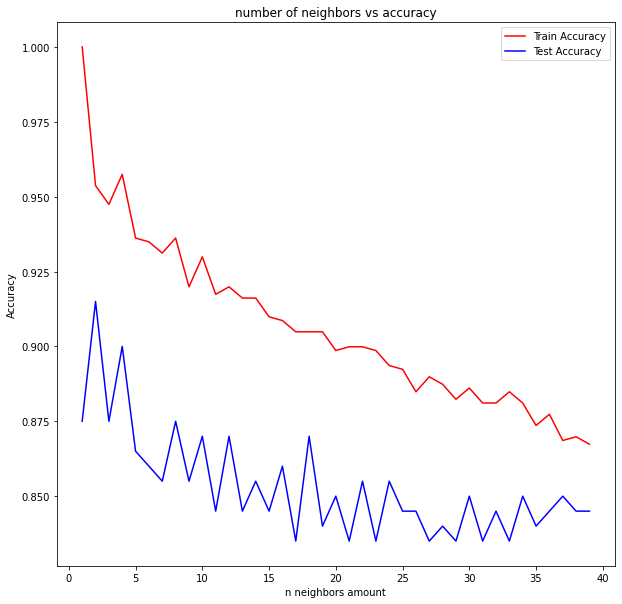

In [13]:
for k in neig:
    KNN = KNeighborsClassifier(n_neighbors = k, algorithm = 'auto', weights = 'uniform')
    KNN.fit(X_train, y_train)
    y_pred = KNN.predict(X_test)
    train_score = KNN.score(X_train, y_train)
    test_score = accuracy_score(y_test, y_pred)
    
    train_accuracy.append(train_score)
    test_accuracy.append(test_score)
    
    ## 找出最佳的準確度
    if test_score > best_score:
        best_score = test_score
        best_knn = KNN
    
## 視覺化: 了解設定什麼k值有最佳的準確度
plt.figure(figsize = (10, 10))
plt.plot(neig, train_accuracy, c = 'red', label = 'Train Accuracy')
plt.plot(neig, test_accuracy, c = 'blue', label = 'Test Accuracy')
plt.title('number of neighbors vs accuracy')
plt.xlabel('n neighbors amount')
plt.ylabel('Accuracy')
plt.legend()

print('Train Score: ', best_knn.score(X_train, y_train))
print('Test Score: ', best_score)
print(best_knn)    

## Random Forest

In [14]:
clf = RandomForestClassifier(random_state = 10)
n_estimators = [20, 30, 60, 90, 120, 140]
max_depth = [1, 7, 10, 20, 40]
split = [5, 10, 17, 20]

param = dict(n_estimators = n_estimators, max_depth = max_depth, min_samples_split = split)

grid_search = GridSearchCV(estimator = clf, param_grid = param, cv = 5, n_jobs = -1, verbose = 1)
grid_result = grid_search.fit(X_train, y_train)

y_pred = grid_result.predict(X_test)
print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Accuracy: 0.866093 using {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 120}


In [15]:
print('Train Score: ', grid_result.score(X_train, y_train))
print('Test Score: ', accuracy_score(y_pred, y_test))

Train Score:  1.0
Test Score:  0.815


## SVC Model

In [16]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
SVCModel = SVC(kernel = 'rbf', max_iter = 1000, C = 0.1)
SVCModel.fit(X_train, y_train)
y_pred = SVCModel.predict(X_test)
print('Train Score: ', SVCModel.score(X_train, y_train))
print('Test Score: ', accuracy_score(y_pred, y_test))


Train Score:  0.8585732165206508
Test Score:  0.795


In [17]:
y_pred.shape

(200,)

## Gaussian Mixture Model
https://ithelp.ithome.com.tw/articles/10195700
https://ithelp.ithome.com.tw/articles/10206244

In [18]:
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

pca = PCA(0.95,whiten=True)
train_pc = pca.fit_transform(train)
test_pc = pca.transform(test)
print(train_pc.shape)
print(test_pc.shape)

(999, 29)
(8999, 29)


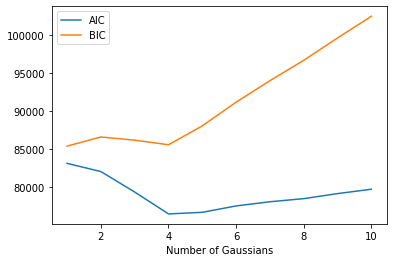

In [19]:
# Let's fit GMM with various number of components
n_components = np.arange(1,11)
models = [GaussianMixture(n, covariance_type='full', random_state=100) 
          for n in n_components]
aics = [model.fit(train_pc).aic(train_pc) for model in models]
bics = [model.fit(train_pc).bic(train_pc) for model in models]

plt.plot(n_components, aics, label='AIC')
plt.plot(n_components, bics, label='BIC')
plt.xlabel('Number of Gaussians')
plt.legend()
plt.show()

In [20]:
best_gmm = GaussianMixture(n_components=4, covariance_type='full').fit(train_pc)

# Let's apply the model to get probabilities
train_gmm = best_gmm.predict_proba(train_pc)
test_gmm = best_gmm.predict_proba(test_pc)
print(train_gmm.shape)
print(test_gmm.shape)

# Split the new data into train and validadtion set
X_train_gmm, X_val_gmm, y_train_gmm, y_val_gmm = train_test_split(train_gmm, train_label, random_state=42, test_size=0.2)

(999, 4)
(8999, 4)


In [33]:
print('X shape: ', X.shape)
print('\n')

lowest_bic = np.infty
bic = []

cv_types = ['tied', 'full', 'diag', 'spherical']

for ct in cv_types:
    for n_components in range(1, 8):
        gmm = GaussianMixture(n_components = n_components,covariance_type = ct)
        gmm.fit(X)
        bic.append(gmm.aic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
best_gmm.fit(X)
gmm_train = best_gmm.predict_proba(X_train)
gmm_val = best_gmm.predict_proba(X_test)
gmm_test = best_gmm.predict_proba(test)
print(gmm.aic(X))

X shape:  (999, 40)


149434.34238474967


In [34]:
print("gmm test: ", gmm_val.shape)
print("gmm_train: ", gmm_train.shape)
print("X train: ", X_train.shape)
print('X test: ', X_test.shape)

gmm test:  (200, 4)
gmm_train:  (799, 4)
X train:  (799, 40)
X test:  (200, 40)


## 將Gaussian Mixture Model重新將數據集聚類的結果，再應用回KNN、RandomForest、SVC

In [35]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
SVCModel = SVC(kernel = 'rbf', max_iter = 1000, C = 0.1)
SVCModel.fit(X_train_gmm, y_train_gmm)
y_pred = SVCModel.predict(X_val_gmm)
print('Train Score: ', SVCModel.score(X_train_gmm, y_train_gmm))
print('Test Score: ', SVCModel.score(X_val_gmm, y_val_gmm))


Train Score:  0.9937421777221527
Test Score:  0.99


In [36]:
SVCModel = SVC(kernel = 'rbf', max_iter = 1000, C = 0.1)
SVCModel.fit(train_gmm, train_label)
y_pred = SVCModel.predict(test_gmm)

In [37]:
submission = {'Id': np.arange(1, y_pred.shape[0]+1),
             'Solution': y_pred}
submission = pd.DataFrame(submission)
submission.to_csv('../output/svc_submission.csv', index=False)

## KNN

Train Score:  1.0
Test Score:  0.99
KNeighborsClassifier(n_neighbors=1)


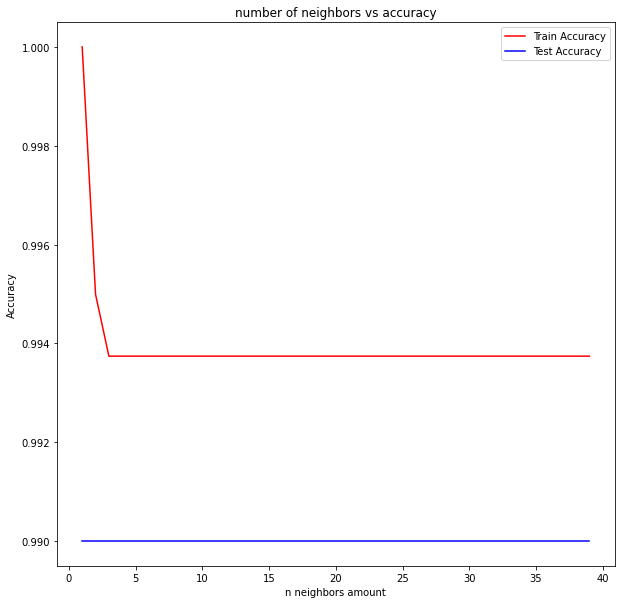

In [39]:
algorithm = ['auto', 'ball_tree', 'brute']
weights = ['uniform', 'distance']
neig = range(1, 40)
train_accuracy = []
test_accuracy = []
best_score = 0.0
best_knn = None

for k in neig:
    KNN = KNeighborsClassifier(n_neighbors = k, algorithm = 'auto', weights = 'uniform')
    KNN.fit(X_train_gmm, y_train_gmm)
    y_pred = KNN.predict(gmm_val)
    train_score = KNN.score(X_train_gmm, y_train_gmm)
    test_score = KNN.score(X_val_gmm, y_val_gmm)
    
    train_accuracy.append(train_score)
    test_accuracy.append(test_score)
    
    ## 找出最佳的準確度
    if test_score > best_score:
        best_score = test_score
        best_knn = KNN
    
## 視覺化: 了解設定什麼k值有最佳的準確度
plt.figure(figsize = (10, 10))
plt.plot(neig, train_accuracy, c = 'red', label = 'Train Accuracy')
plt.plot(neig, test_accuracy, c = 'blue', label = 'Test Accuracy')
plt.title('number of neighbors vs accuracy')
plt.xlabel('n neighbors amount')
plt.ylabel('Accuracy')
plt.legend()

print('Train Score: ', best_knn.score(X_train_gmm, y_train_gmm))
print('Test Score: ', best_score)
print(best_knn)   

In [40]:
best_knn.fit(train_gmm, train_label)
ypred = best_knn.predict(test_gmm)
submission = {'Id': np.arange(1, ypred.shape[0]+1),
             'Solution': ypred}
submission = pd.DataFrame(submission)
submission.to_csv('../output/knn_submission.csv', index=False)

## RandomForest

In [41]:
clf = RandomForestClassifier(random_state = 10)
n_estimators = [20, 30, 60, 90, 120, 140]
max_depth = [1, 7, 10, 20, 40]
split = [5, 10, 17, 20]

param = dict(n_estimators = n_estimators, max_depth = max_depth, min_samples_split = split)

grid_search = GridSearchCV(estimator = clf, param_grid = param, cv = 5, n_jobs = -1, verbose = 1)
grid_result = grid_search.fit(X_train_gmm, y_train_gmm)


print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

print('Train Score: ', grid_result.score(X_train_gmm, y_train_gmm))
print('Test Score: ', grid_result.score(X_val_gmm, y_val_gmm))

Fitting 5 folds for each of 120 candidates, totalling 600 fits


/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection

/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection

/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection

/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection

/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection

/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection

/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection

/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection

/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection

/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection

/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection

/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection

Best Accuracy: 0.996242 using {'max_depth': 1, 'min_samples_split': 5, 'n_estimators': 120}
Train Score:  0.9949937421777222
Test Score:  0.985


In [42]:
grid_search = GridSearchCV(estimator = clf, param_grid = param, cv = 5, n_jobs = -1, verbose = 1)
grid_result = grid_search.fit(train_gmm, train_label)
y_pred = grid_result.predict(test_gmm)
submission = {'Id': np.arange(1, ypred.shape[0]+1),
             'Solution': ypred}
submission = pd.DataFrame(submission)
submission.to_csv('../output/randomforest_submission.csv', index=False)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection

/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection

/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection

/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection

/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection

/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection

/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection

/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection

/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection

/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection

/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection

/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection

/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection

/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection

/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection

/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection

/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection

/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/wanzi/ml/cupoyMarathon/lib64/python3.8/site-packages/sklearn/model_selection